# Q1 Delivery_time -> Predict delivery time using sorting time 

In [308]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [309]:
df = pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Performing EDA On Data

In [310]:
#renaming columns
df1 = df.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}, axis = 1)
df1

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [311]:
# Checking Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [312]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [313]:
#Checking for Null Values
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [314]:
#Checking for Duplicate Values
df[df.duplicated()].shape

(0, 2)

In [315]:
df[df.duplicated()]

,Delivery Time,Sorting Time


# Plotting the data to check for outliers

Text(0.5, 1.0, 'Delivery Time')

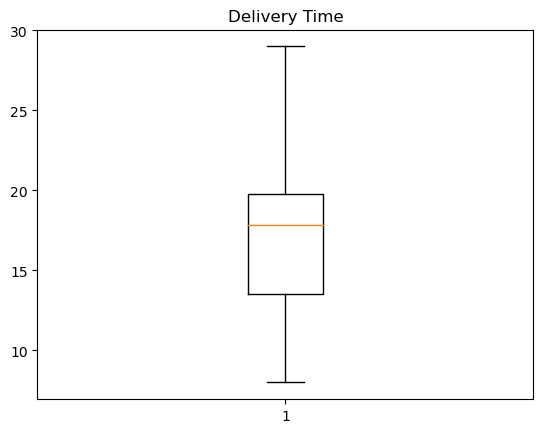

In [316]:
plt.boxplot(df['Delivery Time'])
plt.title('Delivery Time')

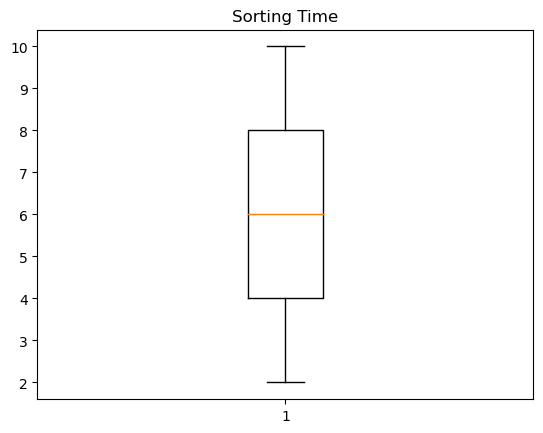

In [317]:
plt.boxplot(df['Sorting Time'])
plt.title('Sorting Time')
plt.show()

# As you can see there are no Outliers in the data

# Checking the Correlation between variables

In [318]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

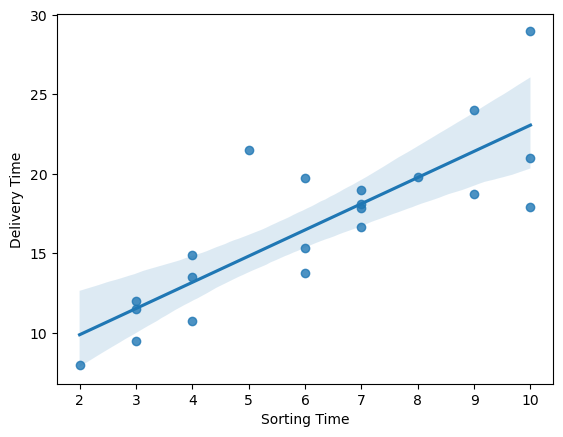

In [319]:
#Visualization of Correlation between x and y
sns.regplot(x=df['Sorting Time'],y=df['Delivery Time'])  

# As you can see above There is good correlation between the two variable.The score is more than 0.8 which is a good sign

# Trying different transformation of data to estimate normal distribution and to remove any skewness

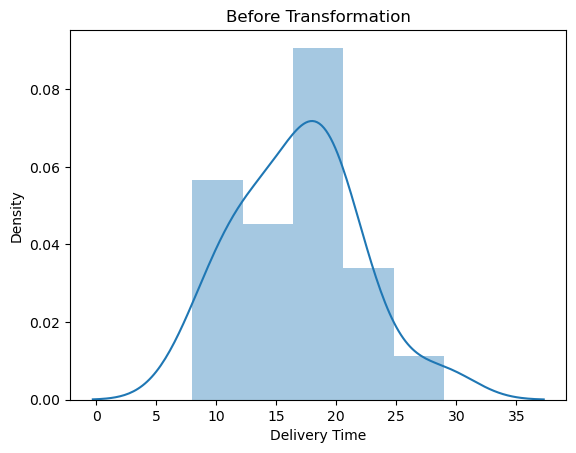

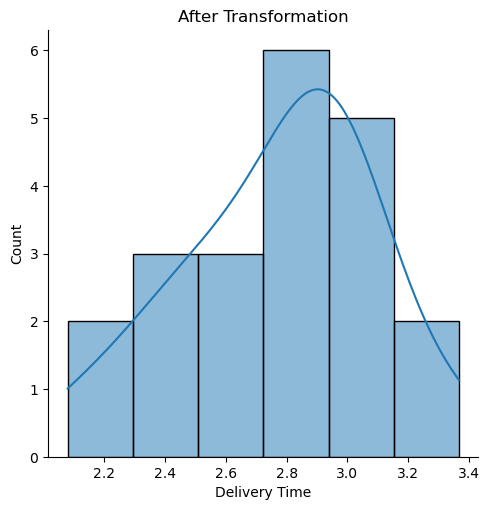

In [320]:
sns.distplot(df['Delivery Time'], )
plt.title('Before Transformation')
sns.displot(np.log(df['Delivery Time']), kde = True)
plt.title('After Transformation')
plt.show()

# As you can see
How log transformation affects the data and it scales the values down.


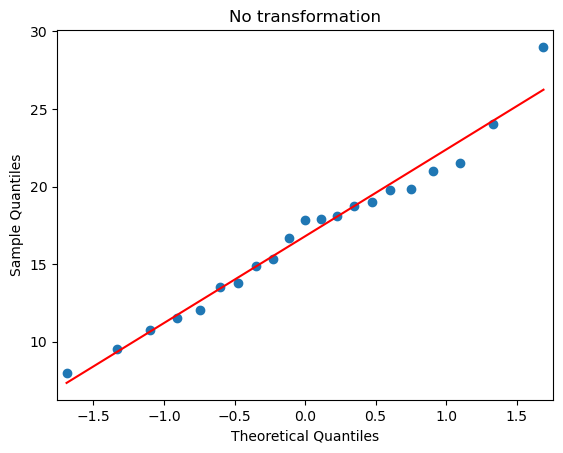

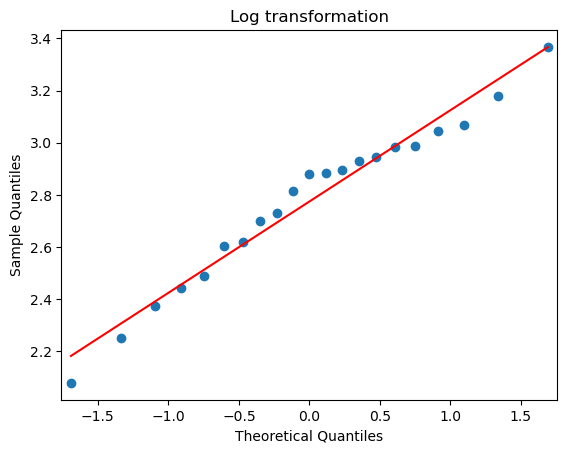

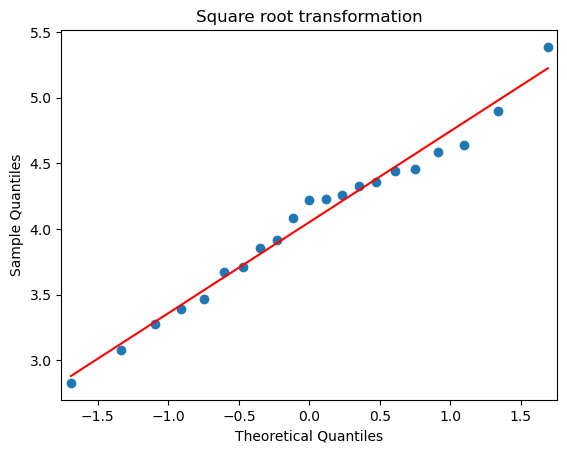

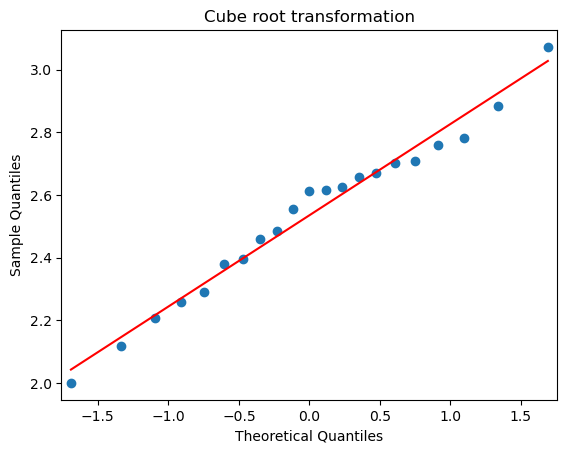

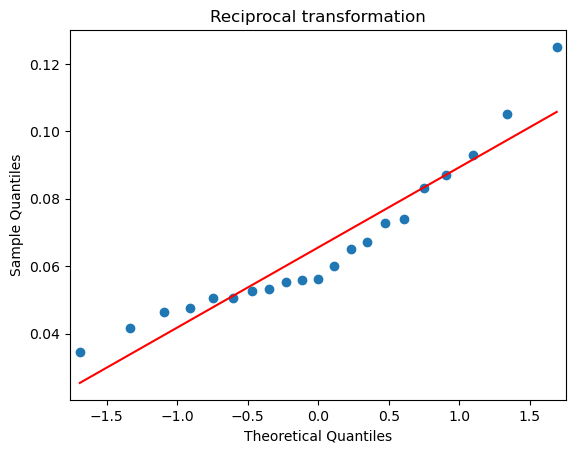

In [321]:
smf.qqplot(df['Delivery Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(df['Delivery Time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['Delivery Time']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(df['Delivery Time']), line = 'r')
plt.title('Cube root transformation')
smf.qqplot(np.reciprocal(df['Delivery Time']), line = 'r')
plt.title('Reciprocal transformation')
plt.show()


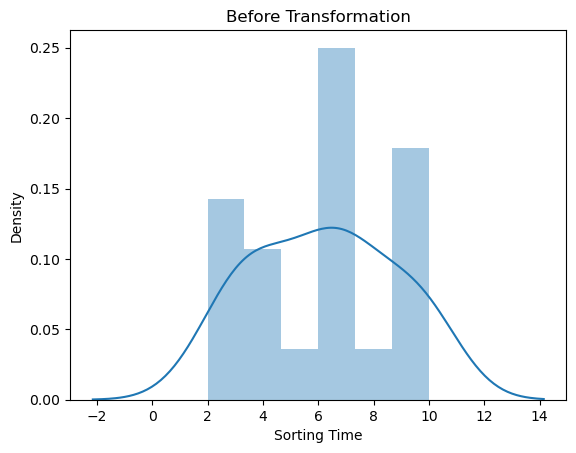

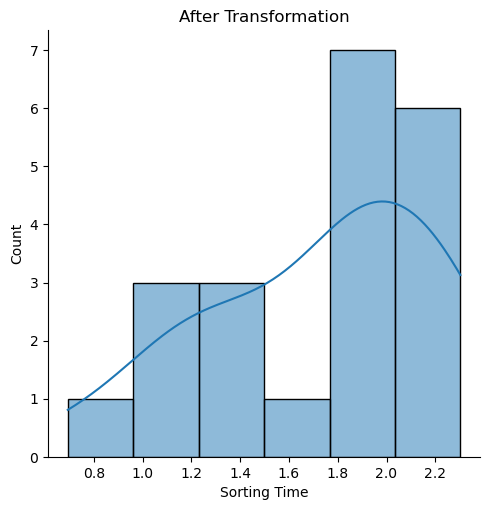

In [322]:
sns.distplot(df['Sorting Time'], bins = 6, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['Sorting Time']), bins = 6, kde = True)
plt.title('After Transformation')
plt.show()

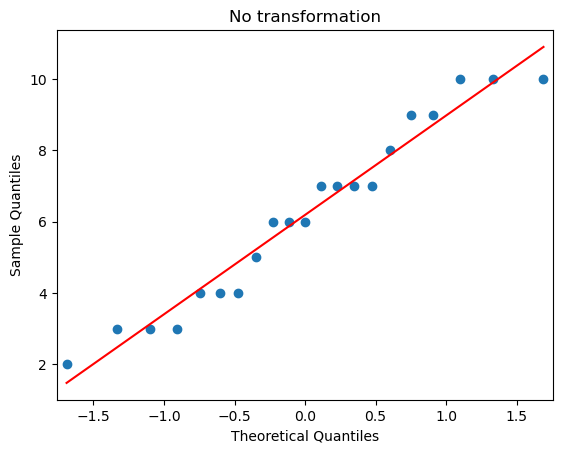

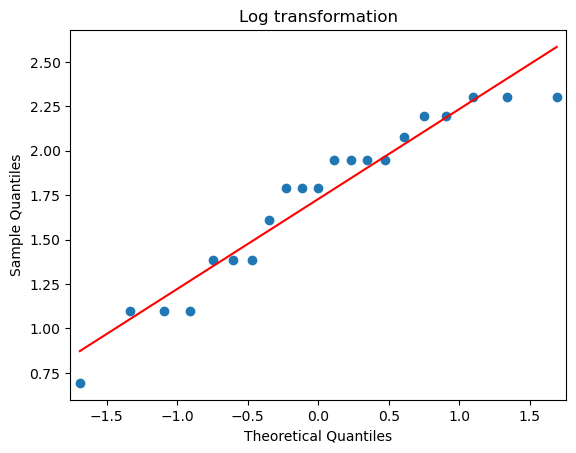

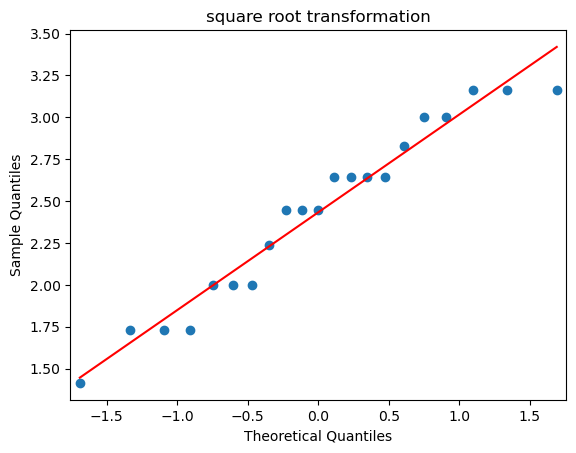

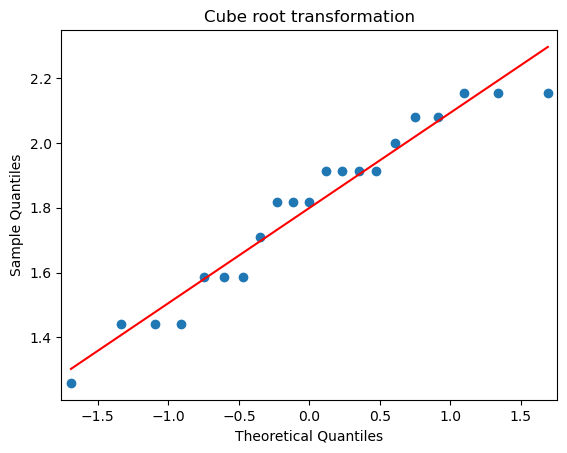

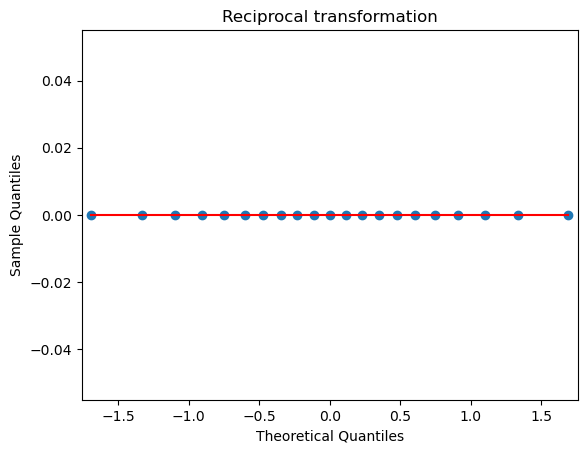

In [323]:
smf.qqplot(df['Sorting Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(df['Sorting Time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['Sorting Time']), line = 'r')
plt.title('square root transformation')
smf.qqplot(np.cbrt(df['Sorting Time']), line = 'r')
plt.title('Cube root transformation')
smf.qqplot(np.reciprocal(df['Sorting Time']), line = 'r')
plt.title('Reciprocal transformation')
plt.show()

We only Perform any data transformation when the data is skewed or not normal

# Fitting a Linear Regression Model

In [324]:
model = sm.ols('Delivery_Time~Sorting_Time', data = df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           3.98e-06
Time:                        01:58:53   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As you can see in the above model
The R-squared and Adjusted R-squared scores are still below 0.85.
 Adjusted R-squared to be greater than 0.8 for a good model for prediction)

In [325]:
#Square Root transformation on data
square_root_model = sm.ols('np.sqrt(Delivery_Time)~np.sqrt(Sorting_Time)', data = df1).fit()
square_root_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_Time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Fri, 22 Dec 2023   Prob (F-statistic):           8.48e-07
Time:                            01:58:53   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting_Time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As you can see in the above model
After Square Root transformation on the Data, R-squared and Adjusted R-squared scores have increased but they are still below 0.85 which is a thumb rule we consider for a good model for prediction.

In [326]:
#Cube Root transformation on Data
cube_root_model = sm.ols('np.cbrt(Delivery_Time)~np.cbrt(Sorting_Time)', data = df1).fit()
cube_root_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(Delivery_Time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Fri, 22 Dec 2023   Prob (F-statistic):           4.90e-07
Time:                            01:58:53   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(Sorting_Time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As you can see in the above model
After Cueb root transformation on the Data, R-squared and Adjusted R-squared scores have increased but they are still below 0.85 which is a thumb rule we consider for a good model for prediction.

In [327]:
#reciprocal transformation on Data
Reciprocal_model = sm.ols('np.reciprocal(Delivery_Time)~np.cbrt(Sorting_Time)', data = df1).fit()
Reciprocal_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     np.reciprocal(Delivery_Time)   R-squared:                       0.757
Model:                                      OLS   Adj. R-squared:                  0.744
Method:                           Least Squares   F-statistic:                     59.21
Date:                          Fri, 22 Dec 2023   Prob (F-statistic):           2.97e-07
Time:                                  01:58:53   Log-Likelihood:                 65.310
No. Observations:                            21   AIC:                            -126.6
Df Residuals:                                19   BIC:                            -124.5
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.1963      0.017     11.435      0.000       0.160       0.232
np.cbrt(Sorting_Time)    -0.0726      0.009     -7.695      0.000      -0.092      -0.053
==============================================================================
Omnibus:                        0.321   Durbin-Watson:                   1.399
Prob(Omnibus):                  0.852   Jarque-Bera (JB):                0.129
Skew:                          -0.176   Prob(JB):                        0.938
Kurtosis:                       2.847   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As you can see in the above model After Reciprocal transformation on the Data, R-squared and Adjusted R-squared scores have increased but they are still below 0.85 which is a thumb rule we consider for a good model for prediction.

In [328]:
#Log transformation on Data
log_model = sm.ols('np.log(Delivery_Time)~np.log(Sorting_Time)', data = df1).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Fri, 22 Dec 2023   Prob (F-statistic):           1.60e-07
Time:                           01:58:53   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As you can see in the above model

After log transformation on the Data, This Model has scored the highest R-squared and Adjusted R-squared scores than the previous model
Yet both Adjusted R-squared and R-squared scores are still below 0.85 which is a thumb rule we consider for a good model for prediction.
Though it is now close to 0.8 which for a single feature/predictor variable or single independent variable is expected to be low. Hence , we can stop here.

In [329]:
# model Testing
# As Y = Beta0 + Beta1*(X)
# finging coefficient parameters
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

Here, (Intercept) Beta0 value = 6.58 & (Sorting Time) Beta1 value = 1.64

Hypothesis testing of X variable by finding test_statistics and P_values for 
Beta1 i.e if (P_value < α=0.05 ; Reject Null)

Null Hypothesis as Beta1=0 (No Slope) and Alternate Hypthesis as Beta1≠0 (Some or significant Slope)

In [330]:
print(model.tvalues,'\n',model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


(Intercept) Beta0: tvalue=3.82 , pvalue=0.001147

(daily) Beta1: tvalue=6.38, pvalue=0.000004

As (pvalue=0)<(α=0.05); Reject Null hypothesis. Thus, X(Sorting Time) variable has good slope and variance w.r.t Y(Delivery Time) variable.

In [331]:
model.rsquared,model.rsquared_adj
(0.6822714748417231, 0.6655489208860244)


(0.6822714748417231, 0.6655489208860244)

In [332]:
#Determination Coefficient = rsquared value = 0.68 ; very good fit >= 85%


# Comparing different models with respect to their Root Mean Squared Errors

In [333]:
from sklearn.metrics import mean_squared_error
model_pred_y = model.predict(df1[['Sorting_Time']])
square_root_pred_y =np.square(square_root_model.predict(df1['Sorting_Time']))
cube_root_pred_y =pow(cube_root_model.predict(df1['Sorting_Time']),3)
log_model_pred_y =np.exp(log_model.predict(df1['Sorting_Time']))


In [334]:
model_rmse = np.sqrt(mean_squared_error(df1['Delivery_Time'], model_pred_y))
square_root_rmse =np.sqrt(mean_squared_error(df1['Delivery_Time'], square_root_pred_y))
cube_root_rmse =np.sqrt(mean_squared_error(df1['Delivery_Time'], cube_root_pred_y))
log_rmse =np.sqrt(mean_squared_error(df1['Delivery_Time'], log_model_pred_y))
print('Linear Model RMSE:', model_rmse)
print('Square Root Model RMSE:', square_root_rmse)
print('Cube Root Model RMSE:', cube_root_rmse)
print('Log Model RMSE:', log_rmse)

Linear Model RMSE: 2.7916503270617654
Square Root Model RMSE: 2.7622942793208676
Cube Root Model RMSE: 2.7555843098935746
Log Model RMSE: 2.7458288976145493


In [335]:
data = {'model': np.sqrt(model.mse_resid), 'square_root_model': square_root_rmse, 'cube_root_model': cube_root_rmse, 'log_model' : log__rmse}
min(data, key=data.get)

'log_model'

As log_model has the minimum RMSE and highest Adjusted R-squared score. Hence, we are going to use log_model to predict our values

log_model is the model where we did log transformation on both dependent variable as well as on independent variable

In [336]:
#Predicting values from Model with Log Transformation on the Data
predicted = pd.DataFrame()
predicted['Sorting_Time'] = df1.Sorting_Time
predicted['Delivery_Time'] = df1.Delivery_Time
predicted['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(log_model.predict(predicted.Sorting_Time)))
predicted

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593


# Q2 Salary_hike -> Build a prediction model for Salary_hike
 

In [337]:
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [338]:
#Performing EDA On Data
#Checking Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [339]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [340]:
# Checking for Null Values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [341]:
# Checking for Duplicate Values
df[df.duplicated()].shape

(0, 2)

In [342]:
df[df.duplicated()]

,YearsExperience,Salary


Text(0.5, 1.0, 'Salary Hike')

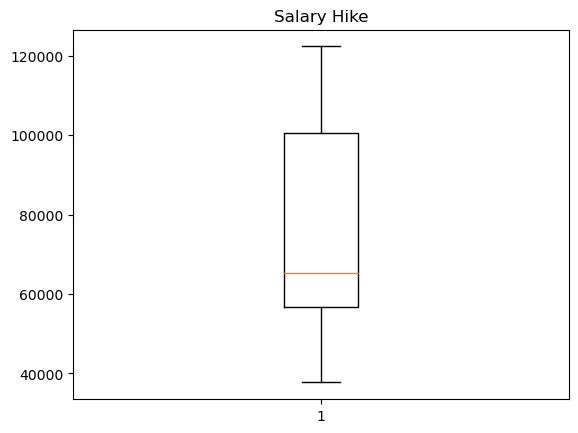

In [343]:
#Plotting the data to check for outliers
plt.boxplot(df['Salary'])
plt.title('Salary Hike')

Text(0.5, 1.0, 'Years of Experience')

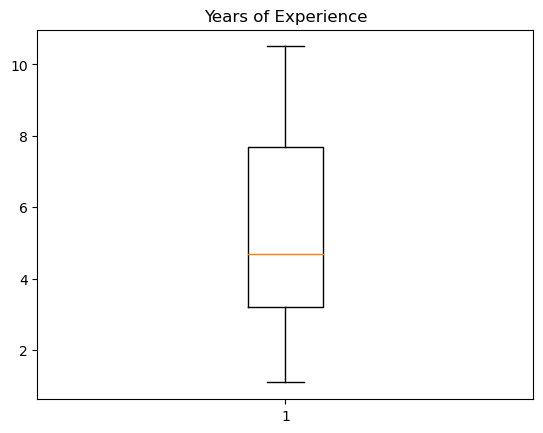

In [344]:
plt.boxplot(df['YearsExperience'])
plt.title('Years of Experience')


As you can see there are no Outliers in the data

In [345]:
#Checking the Correlation between variables
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

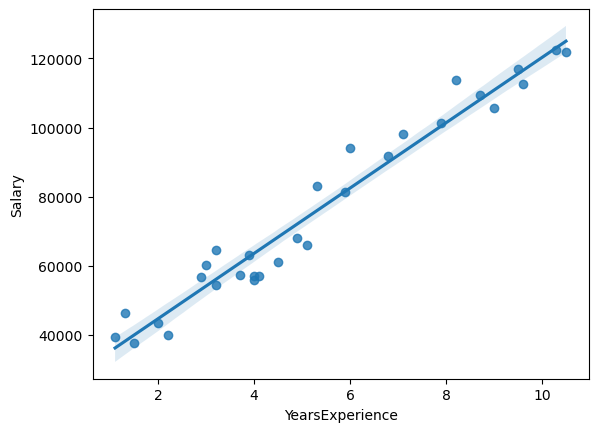

In [346]:
# Visualization of Correlation between x and y
sns.regplot(x=df['YearsExperience'],y=df['Salary'])  

As you can see above
There is good correlation between the two variable.
The score is more than 0.8 which is a good sign

# trying different transformation of data

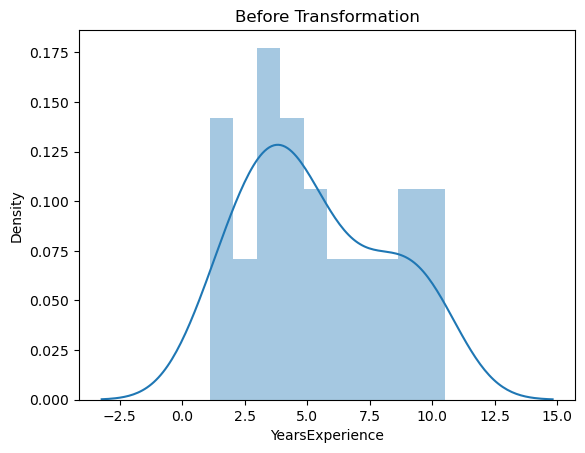

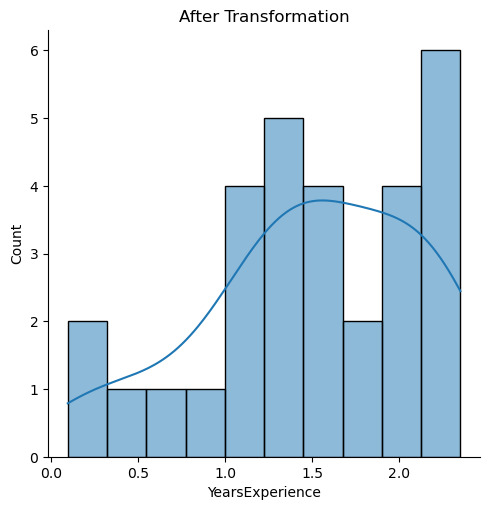

In [347]:
sns.distplot(df['YearsExperience'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['YearsExperience']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

As you can see
How log transformation affects the data and it scales the values down.

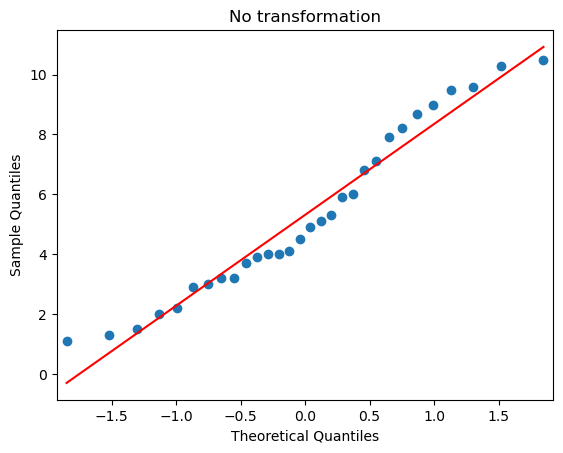

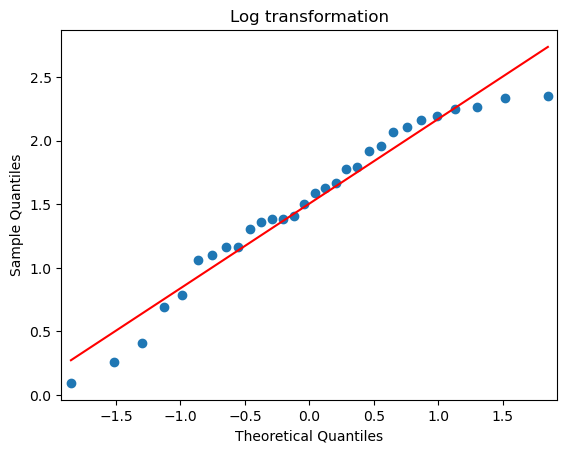

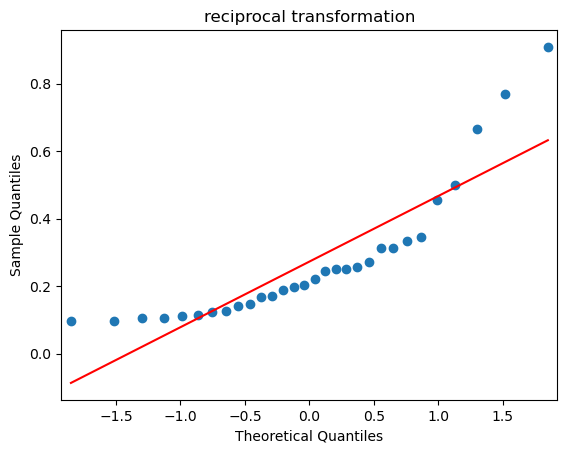

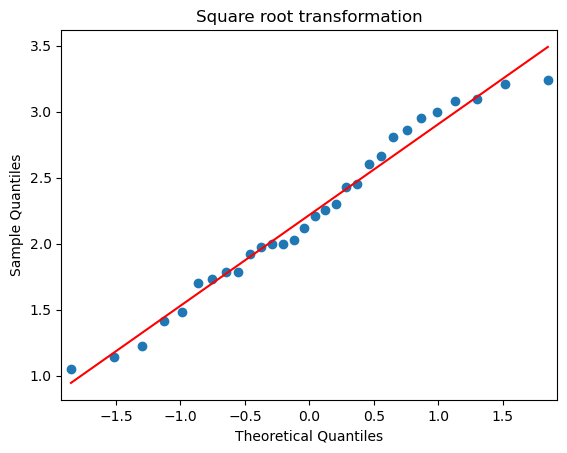

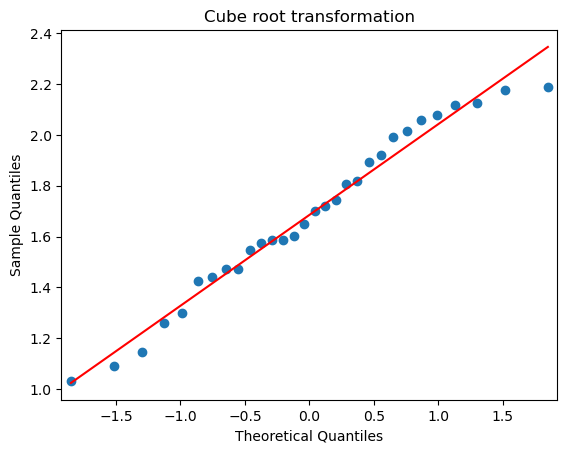

In [348]:
smf.qqplot(df['YearsExperience'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(df['YearsExperience']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.reciprocal(df['YearsExperience']), line = 'r')
plt.title('reciprocal transformation')
smf.qqplot(np.sqrt(df['YearsExperience']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(df['YearsExperience']), line = 'r')
plt.title('Cube root transformation')
plt.show()

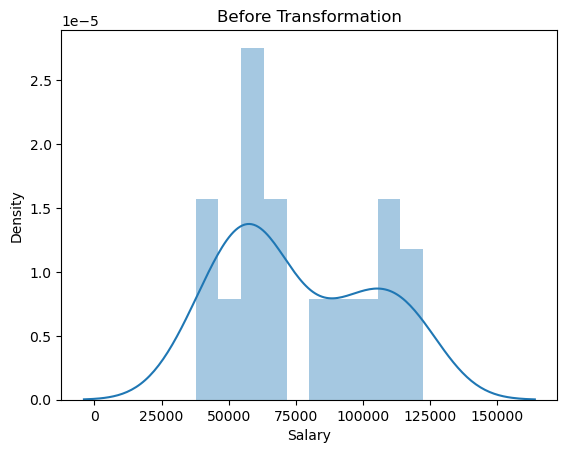

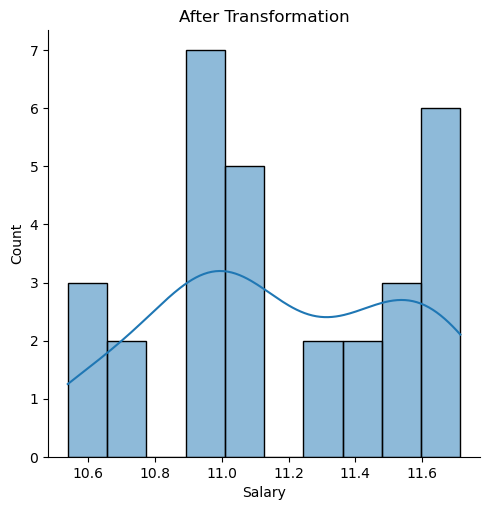

In [349]:
sns.distplot(df['Salary'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['Salary']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

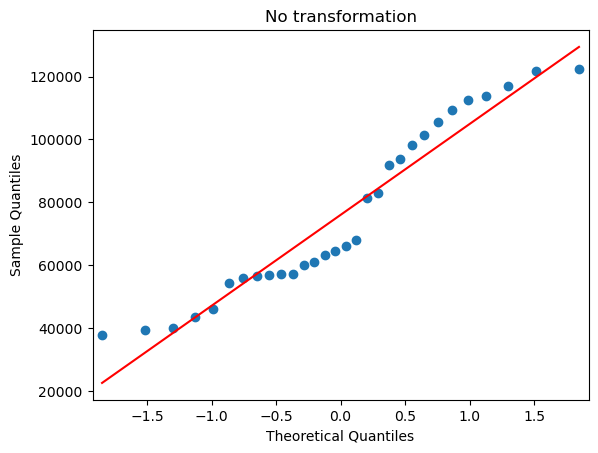

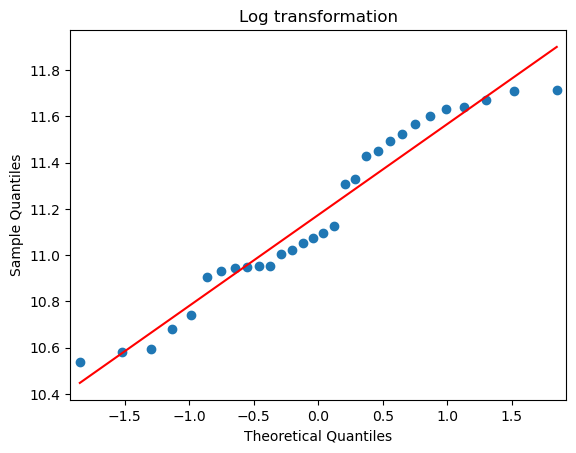

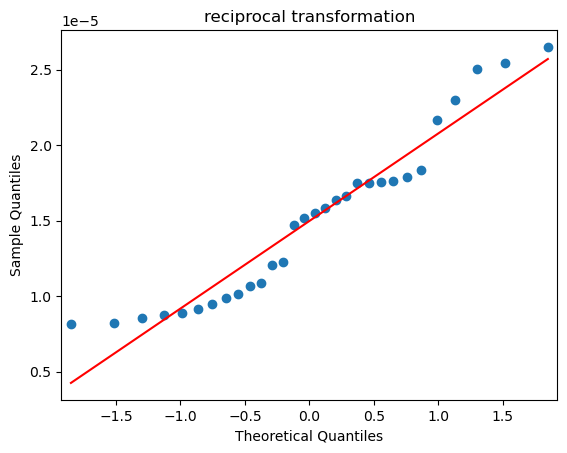

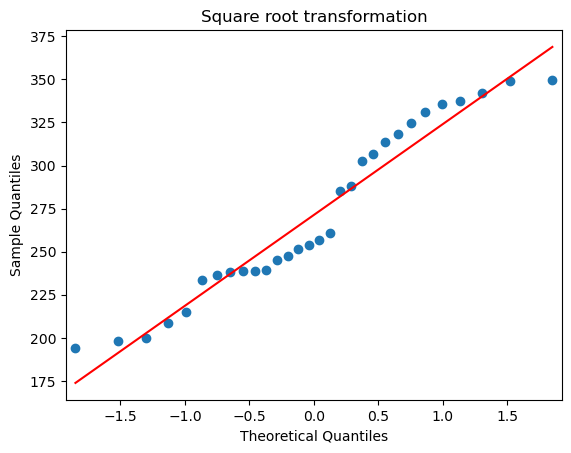

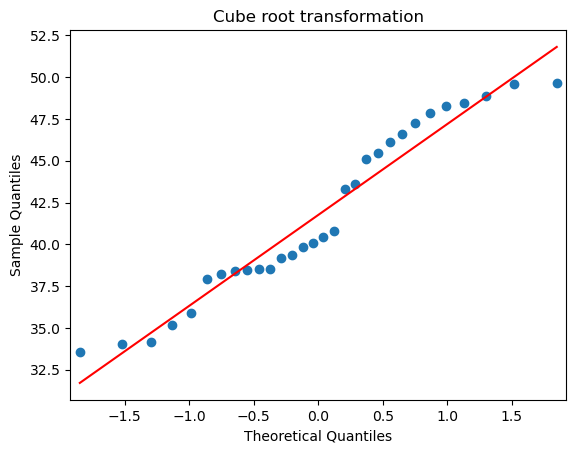

In [350]:
smf.qqplot(df['Salary'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(df['Salary']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.reciprocal(df['Salary']), line = 'r')
plt.title('reciprocal transformation')
smf.qqplot(np.sqrt(df['Salary']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(df['Salary']), line = 'r')
plt.title('Cube root transformation')
plt.show()

# Fitting a Linear Regression Model
## Using Ordinary least squares (OLS) regression

In [351]:
import statsmodels.formula.api as sm
model = sm.ols('Salary~YearsExperience', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           1.14e-20
Time:                        01:59:05   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As you can notice in the above model
The R-squared and Adjusted R-squared scores are above 0.85.
(It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)
F-statitics is quite high as well and yes desire it to be higher
But log-likelihood is quite very low far away from 0
and AIC and BIC score are much higher for this model

In [352]:
#Square Root transformation on data
model1 = sm.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           7.58e-19
Time:                        01:59:05   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As you can notice in the above model
The R-squared and Adjusted R-squared scores are above 0.85. but its has gotten less than previous model
(It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)
F-statitics has gotten a little lower for this model than previous.
But log-likelihood got better than before close to 0 higher than previous model
and AIC and BIC score are now much better for this model

In [353]:
#Cuberoot transformation on Data
model2 = sm.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)', data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           6.37e-18
Time:                        01:59:05   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As you can notice in the above model The R-squared and Adjusted R-squared scores are above 0.85. but its has gotten less than previous model (It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction) F-statitics has gotten a little lower for this model than previous. But log-likelihood got better than before close to 0 higher than previous model and AIC and BIC score are now much better for this model

In [354]:
#reciprocal transformation on Data
model4 = sm.ols('np.reciprocal(Salary)~np.log(YearsExperience)', data = df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.reciprocal(Salary)   R-squared:                       0.917
Model:                               OLS   Adj. R-squared:                  0.914
Method:                    Least Squares   F-statistic:                     310.5
Date:                   Fri, 22 Dec 2023   Prob (F-statistic):           1.09e-16
Time:                           01:59:05   Log-Likelihood:                 358.63
No. Observations:                     30   AIC:                            -713.3
Df Residuals:                         28   BIC:                            -710.5
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2.769e-05   7.79e-07     35.548      0.000    2.61e-05    2.93e-05
np.log(YearsExperience) -8.444e-06   4.79e-07    -17.620      0.000   -9.43e-06   -7.46e-06
==============================================================================
Omnibus:                        1.201   Durbin-Watson:                   1.738
Prob(Omnibus):                  0.548   Jarque-Bera (JB):                0.310
Skew:                           0.066   Prob(JB):                        0.857
Kurtosis:                       3.480   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [355]:
#Log transformation on Data
model3 = sm.ols('np.log(Salary)~np.log(YearsExperience)', data = df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Fri, 22 Dec 2023   Prob (F-statistic):           7.40e-16
Time:                        01:59:05   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [356]:
# Model Testing
# As Y = Beta0 + Beta1*(X)
# Finding Coefficient Parameters (Beta0 and Beta1 values)
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

Here, (Intercept) Beta0 value = 25792.20 & (YearsExperience) Beta1 value = 9449.96

Hypothesis testing of X variable by finding test_statistics and P_values for Beta1 i.e if (P_value < α=0.05 ; Reject Null)

Null Hypothesis as Beta1=0 (No Slope) and Alternate Hypthesis as Beta1≠0 (Some or significant Slope)


In [357]:
print(model.tvalues,'\n',model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


(Intercept) Beta0: tvalue=11.34 , pvalue=5.511950e-12
(daily) Beta1: tvalue=24.95, pvalue= 1.143068e-20
As (pvalue=0)<(α=0.05); Reject Null hyp. Thus, X(YearsExperience) variable has good slope and variance w.r.t Y(Salary) variable.

In [358]:
model.rsquared,model.rsquared_adj
(0.9569566641435086, 0.9554194021486339)

(0.9569566641435086, 0.9554194021486339)

In [359]:
#Determination Coefficient = rsquared value = 0.95 ; very good fit >= 85

In [360]:
#Comparing different models with respect to the Root Mean Squared Errors
from sklearn.metrics import mean_squared_error

In [361]:
model1_pred_y =np.square(model1.predict(df['YearsExperience']))
model2_pred_y =pow(model2.predict(df['YearsExperience']),3)
model3_pred_y =np.exp(model3.predict(df['YearsExperience']))
model4_pred_y =np.reciprocal(model4.predict(df['YearsExperience']))

In [362]:
model1_rmse =np.sqrt(mean_squared_error(df['Salary'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(df['Salary'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(df['Salary'], model3_pred_y))
model4_rmse =np.sqrt(mean_squared_error(df['Salary'], model4_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse,'\n' 'model4=', model4_rmse)


model= 5788.315051119395 
model1= 5960.647096174306 
model2= 6232.815455835857 
model3= 7219.716974372746 
model4= 6080.7445586606555


In [363]:
rmse = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(rmse, key=rmse.get)

'model'

As model has the minimum RMSE and highest Adjusted R-squared score. Hence, we are going to use model to predict our values

In [364]:
# model results without any transformation
predicted2 = pd.DataFrame()
predicted2['YearsExperience'] = df['YearsExperience']
predicted2['Salary'] = df['Salary']
predicted2['Predicted_Salary_Hike'] = pd.DataFrame(model.predict(predicted2[['YearsExperience']]))

predicted2


,YearsExperience,Salary,Predicted_Salary_Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
